*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3L1reg-040202M2N3-L0-2/'
FileBaseName = '3L1reg-040202M2N3-L0-2'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3L1reg-040202M2N3-L0-2/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3L1reg-040202M2N3-L0-2/


$M=2$, $N=3$の不良設定問題
$$
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2}
  \end{array}
\right)
=
\left(
  \begin{array}{ccc}
    X_{11} & X_{12} & X_{13} \\
    X_{21} & X_{22} & X_{23}
  \end{array}
\right)
\left(
  \begin{array}{c}
    \omega_{1} \\
    \omega_{2} \\
    \omega_{3}
  \end{array}
\right)
$$

$M=2$, $N=3$の不良設定問題の例
$$
\underbrace{
  \left(
    \begin{array}{c}
      -2 \\
      3
    \end{array}
  \right)
}_{\boldsymbol{y}}
=
\underbrace{
  \left(
    \begin{array}{ccc}
      2  &  -1 & 3 \\
      -1 &  1  & 2
    \end{array}
  \right)
}_{\mathbf{X}}
\underbrace{
  \left(
    \begin{array}{c}
      \omega_{1} \\
      \omega_{2} \\
      \omega_{3}
    \end{array}
  \right)
}_{\boldsymbol{\omega}}
$$

In [4]:
############################################
y_data = np.array( [-2, 3] )
#
X_mat = np.array( [ [2, -1, 3], [-1, 1, 2] ] )

解く連立方程式

$$
-2 = 2\,\omega_{1} - \omega_{2} + 3\,\,\omega_{3}
,\,\,\, \cdots (a)
$$

$$
3 = -\omega_{1} + \omega_{2} + 2\,\,\omega_{3}
,\,\,\,\,\,\,\, \cdots (b)
$$

* $(a)+2(b)$

$$
4 = \omega_{2} + 7\,\omega_{3},
\quad
\omega_{3}
=
\frac{4-\omega_{2}}{7},
\quad
\omega_{2}
=
4-7\,\omega_{3}
\quad
\cdots(c)
$$

* $(a)+(b)$

$$
1 = \omega_{1}+5\,\omega_{3},
\quad
\omega_{3}
=
\frac{1-\omega_{1}}{5},
\quad
\omega_{1} = 1 - 5\,\omega_{3}
\quad
\cdots(d)
$$

(a), (b)の連立方程式は次式の直線を表し、直線上のすべての$\boldsymbol{\omega}$は、$\boldsymbol{y}=\mathbf{X}\,\boldsymbol{\omega}$の関係を満たす。

$$
\frac{4-\omega_{2}}{7}
=
\frac{1-\omega_{1}}{5}
=
\omega_{3}
$$

よって$(a)$, $(b)$の連立方程式は、2つの平面$(c)$, $(d)$の連立、つまりそれらの交線上の$\boldsymbol{\omega}$であれば、$\boldsymbol{y}=\mathbf{X}\,\boldsymbol{\omega}$を満たす。

$(c)$, $(d)$の直線で、

* $\omega_{1}=0$となる点:  $\omega_{2}=13/5, \omega_{3}=1/5$

* $\omega_{2}=0$となる点:  $\omega_{1}=-13/7, \omega_{3}=4/7$

* $\omega_{3}=0$となる点:  $\omega_{1}=1, \omega_{2}=4$

3Dグラフ

In [5]:
############################################
xyz_lim = 5.5
############################################
def Grf3D( L1=17/7, L1label=r'L1=$\frac{17}{7}$', omega1_plane=True, omega2_plane=True, omega3_plane=True ):
  #
  plt.rcParams['font.size'] = 20
  #
  fig = plt.figure(figsize=(10.5, 7))
  #
  fig.subplots_adjust(left=0.0, right=0.6, top=1.0, bottom=0.0, hspace=0.0, wspace=0.0)
  #
  ax1 = fig.add_subplot( projection='3d' )
  #
  ax1.set_xlim( -xyz_lim, xyz_lim )
  ax1.set_ylim( -xyz_lim, xyz_lim )
  ax1.set_zlim( -xyz_lim, xyz_lim )
  #
  ax1.set_xlabel( r'$\omega_{1}$', labelpad=10 )
  ax1.set_ylabel( r'$\omega_{2}$', labelpad=10 )
  ax1.set_zlabel( r'$\omega_{3}$', labelpad=10 )
  #
  # ラベルを見やすいようにする
  xyz_tick = -( xyz_lim // 2 ) * 2
  xyz_ticks       = []
  xyz_ticks_label = []
  #
  while xyz_tick <= xyz_lim:
    xyz_ticks.append( xyz_tick )
    xyz_ticks_label.append( '%+d' % xyz_tick )
    xyz_tick = xyz_tick + 2
  #
  ax1.set_xticks( xyz_ticks )
  ax1.set_xticklabels( xyz_ticks_label, rotation=-45, ha='left', va='center_baseline')
  #
  ax1.set_yticks( xyz_ticks )
  ax1.set_yticklabels( xyz_ticks_label, rotation=10, ha='right', va='center_baseline')
  #
  ax1.set_zticks( xyz_ticks )
  ax1.set_zticklabels( xyz_ticks_label, rotation=10, ha='right', va='center_baseline')
  #
  ax1.get_xaxis().set_tick_params( pad=-5)
  ax1.get_yaxis().set_tick_params( pad=-5)
  ax1.get_zaxis().set_tick_params( pad=-5)
  #
  #################
  alpha_plane = 0.3
  ls = LightSource(270, 45)
  #
  # omega_1 = 0 平面
  if omega1_plane:
    y_     = np.linspace( -xyz_lim, +xyz_lim, num = 2)
    z_     = np.linspace( -xyz_lim, +xyz_lim, num = 2)
    Y_, Z_ = np.meshgrid( y_, z_ )
    X_     = np.zeros_like(Y_)
    ax1.plot_surface( X_, Y_, Z_, alpha=alpha_plane, color='brown', shade=True, lightsource=ls )
  #
  # omega_2 = 0 平面
  if omega2_plane:
    x_     = np.linspace( -xyz_lim, +xyz_lim, num = 2)
    z_     = np.linspace( -xyz_lim, +xyz_lim, num = 2)
    X_, Z_ = np.meshgrid( x_, z_ )
    Y_     = np.zeros_like(X_)
    ax1.plot_surface( X_, Y_, Z_, alpha=alpha_plane, color='green', shade=True, lightsource=ls  )
  #
  # omega_3 = 0 平面
  if omega3_plane:
    x_     = np.linspace( -xyz_lim, +xyz_lim, num = 2)
    y_     = np.linspace( -xyz_lim, +xyz_lim, num = 2)
    X_, Y_ = np.meshgrid( x_, y_ )
    Z_     = np.zeros_like(X_)
    ax1.plot_surface( X_, Y_, Z_, alpha=alpha_plane, color='blue', shade=True, lightsource=ls  )
  #
  # omega_1 = 0, omega_2 = 0 の直線
  ax1.plot( [0, 0], [0,0], [-xyz_lim, xyz_lim], color='black', linewidth=0.5 )
  #
  # omega_2 = 0, omega_3 = 0 の直線
  ax1.plot( [-xyz_lim, xyz_lim], [0, 0], [0,0], color='black', linewidth=0.5 )
  #
  # omega_1 = 0, omega_3 = 0 の直線
  ax1.plot( [0, 0], [-xyz_lim, xyz_lim], [0,0], color='black', linewidth=0.5 )
  #
  #################
  # L1の八角形
  if L1 is not None:
    triangle = list( zip( [L1,0,0], [0,L1,0], [0,0,L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=0.5 )
    #
    triangle = list( zip( [-L1,0,0], [0,L1,0], [0,0,L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1 )
    #
    triangle = list( zip( [L1,0,0], [0,-L1,0], [0,0,L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1 )
    #
    triangle = list( zip( [L1,0,0], [0,L1,0], [0,0,-L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1 )
    #
    triangle = list( zip( [-L1,0,0], [0,-L1,0], [0,0,L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1 )
    #
    triangle = list( zip( [L1,0,0], [0,-L1,0], [0,0,-L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1 )
    #
    triangle = list( zip( [-L1,0,0], [0,L1,0], [0,0,-L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1 )
    #
    triangle = list( zip( [-L1,0,0], [0,-L1,0], [0,0,-L1]))
    ax1.add_collection3d(art3d.Poly3DCollection([triangle], color='magenta',alpha=0.2, edgecolor=None, lightsource=ls ))
    ax1.plot( np.array(triangle[0]), np.array(triangle[1]), np.array(triangle[2]), color='magenta', linewidth=1, label=L1label )
    #
  #################
  # (c), (d)を満たす直線
  omega3s = np.linspace( - xyz_lim, xyz_lim, num=100)
  omega2s = 4 - 7 * omega3s
  omega1s = 1 - 5 * omega3s
  omega123 = np.zeros( (3, len(omega3s) ) )
  omega123[0,:] = omega1s
  omega123[1,:] = omega2s
  omega123[2,:] = omega3s
  omega123 = omega123[:, (omega2s <= 8) & (omega2s >= -8) & (omega1s <= 8) & (omega1s >= -8) ]
  ax1.plot( omega123[0], omega123[1], omega123[2], color='red', linewidth=2,
            label=r'$\frac{1-\omega_{1}}{5}=\frac{4-\omega_{2}}{7}=\omega_{3}$' )
  #
  #################
  # $\omega_{1}=0$となる点:  $\omega_{2}=13/5, \omega_{3}=1/5$
  if omega1_plane:
    omega1_ = 0
    omega2_ = 13/5
    omega3_ = 1/5
    ax1.scatter( [omega1_], [omega2_], [omega3_], marker='o', color='brown', s=25,
                 label=r'$\omega_{1}=0, \omega_{2}=\frac{13}{5}, \omega_{3}=\frac{1}{5}$' )
  #
  #################
  # $\omega_{2}=0$となる点:  $\omega_{1}=-13/7, \omega_{3}=4/7$
  if omega2_plane:
    omega1_ = -13/7
    omega2_ = 0
    omega3_ = 4/7
    ax1.scatter( [omega1_], [omega2_], [omega3_], marker='o', color='green', s=25,
                 label=r'$\omega_{1}=-\frac{13}{7}, \omega_{2}=0, \omega_{3}=\frac{4}{7}$' )
  #
  #################
  # $\omega_{3}=0$となる点:  $\omega_{1}=1, \omega_{2}=4$
  if omega3_plane:
    omega1_ = 1
    omega2_ = 4
    omega3_ = 0
    ax1.scatter( [omega1_], [omega2_], [omega3_], marker='o', color='blue', s=25,
                 label=r'$\omega_{1}=1, \omega_{2}=4, \omega_{3}=0$'  )
  #
  #################
  # 視点
  ax1.view_init(elev=10, azim=70)# azim=135)
  ax1.set_box_aspect(( 2 * xyz_lim, 2 * xyz_lim, 2 * xyz_lim ))
  #
  #################
  ax1.legend( bbox_to_anchor=(0.9,0.5), loc='center left', borderaxespad=1 )
  #
  plt.show()
  #
  return fig

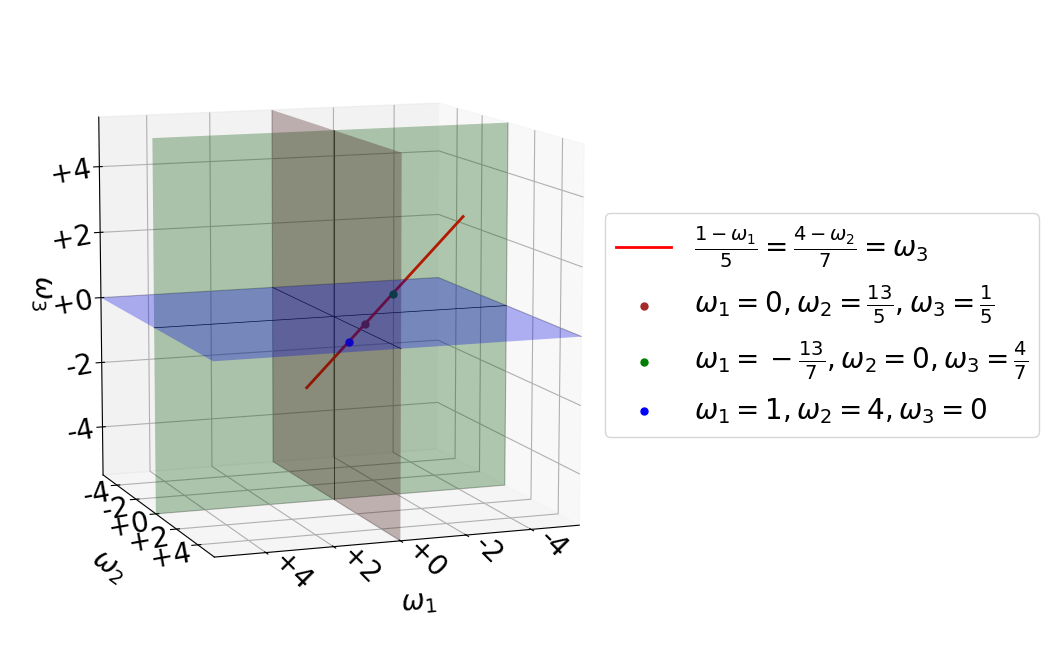

In [6]:
############################################
# fig = Grf3D( L1=14/5, L1label=r'L1=$\frac{14}{5}$', omega1_plane=True,  omega2_plane=False, omega3_plane=False )
# fig = Grf3D( L1=17/7, L1label=r'L1=$\frac{17}{7}$', omega1_plane=False, omega2_plane=True, omega3_plane=False )
# fig = Grf3D( L1=5, L1label=r'L1=5', omega1_plane=False, omega2_plane=False, omega3_plane=True )
fig = Grf3D( L1=None, omega1_plane=True, omega2_plane=True, omega3_plane=True )
#
fig.savefig( FilePath + FileBaseName + '-01.pdf' )

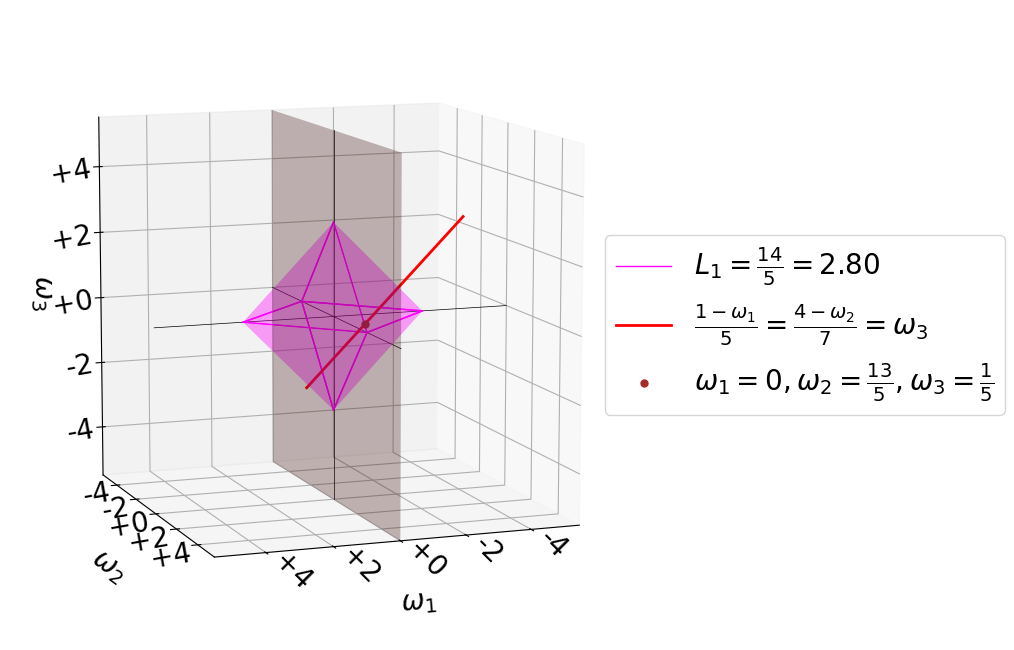

In [7]:
############################################
fig = Grf3D( L1=14/5, L1label=r'$L_{1}=\frac{14}{5}=2.80$', omega1_plane=True,  omega2_plane=False, omega3_plane=False )
# fig = Grf3D( L1=17/7, L1label=r'L1=$\frac{17}{7}$', omega1_plane=False, omega2_plane=True, omega3_plane=False )
# fig = Grf3D( L1=5, L1label=r'L1=5', omega1_plane=False, omega2_plane=False, omega3_plane=True )
# fig = Grf3D( L1=None, omega1_plane=True, omega2_plane=True, omega3_plane=True )
#
fig.savefig( FilePath + FileBaseName + '-L1_14_5.pdf' )

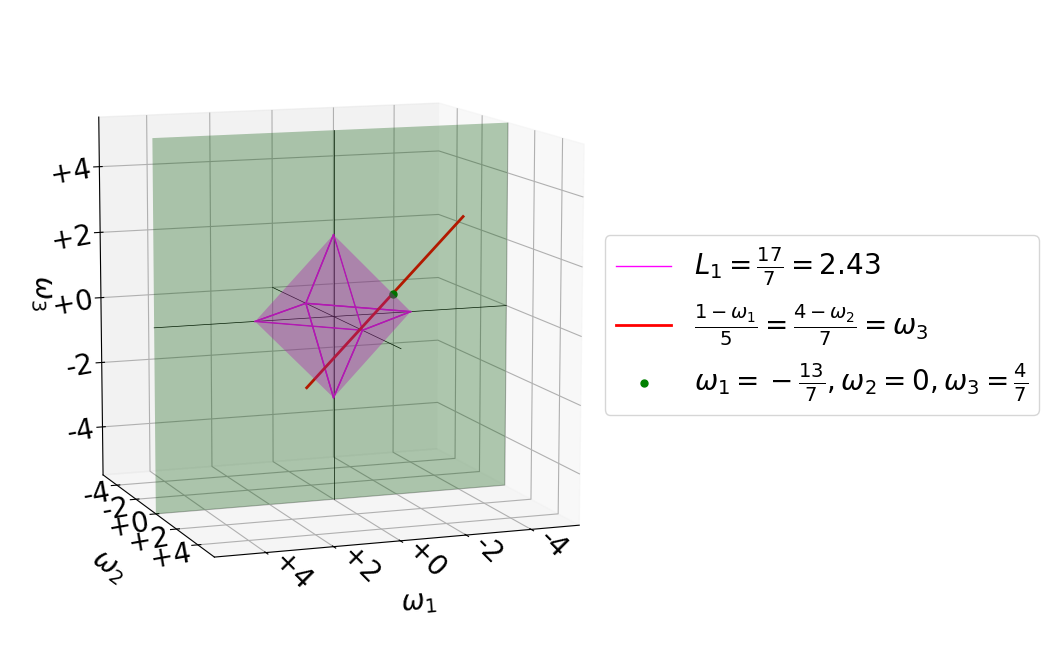

In [8]:
############################################
# fig = Grf3D( L1=14/5, L1label=r'L1=$\frac{14}{5}$', omega1_plane=True,  omega2_plane=False, omega3_plane=False )
fig = Grf3D( L1=17/7, L1label=r'$L_{1}=\frac{17}{7}=2.43$', omega1_plane=False, omega2_plane=True, omega3_plane=False )
# fig = Grf3D( L1=5, L1label=r'L1=5', omega1_plane=False, omega2_plane=False, omega3_plane=True )
# fig = Grf3D( L1=None, omega1_plane=True, omega2_plane=True, omega3_plane=True )
#
fig.savefig( FilePath + FileBaseName + '-L1_17_7.pdf' )

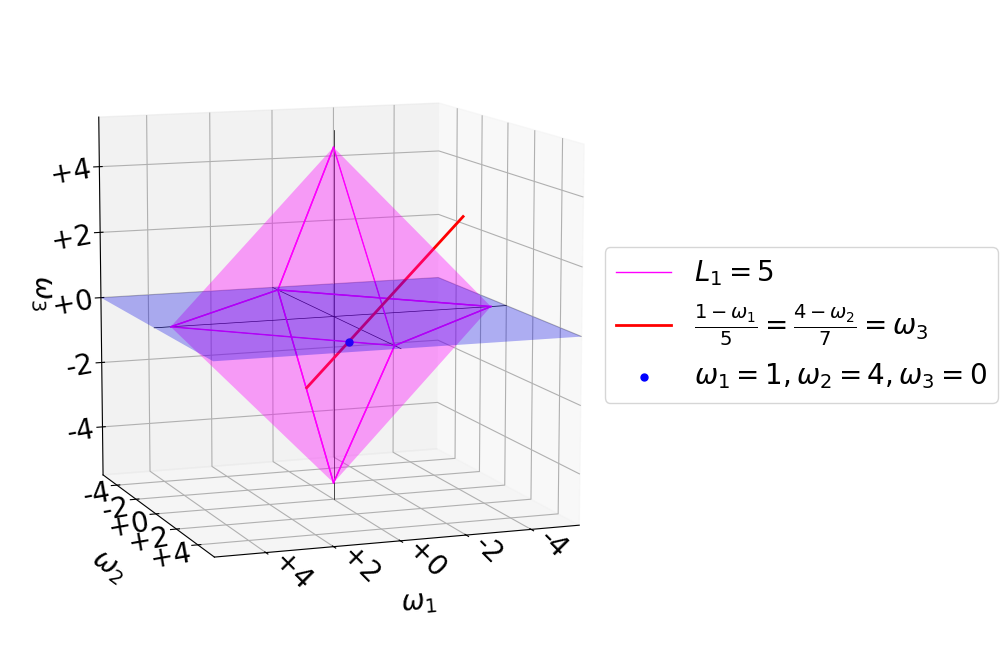

In [9]:
############################################
# fig = Grf3D( L1=14/5, L1label=r'L1=$\frac{14}{5}$', omega1_plane=True,  omega2_plane=False, omega3_plane=False )
# fig = Grf3D( L1=17/7, L1label=r'L1=$\frac{17}{7}$', omega1_plane=False, omega2_plane=True, omega3_plane=False )
fig = Grf3D( L1=5, L1label=r'$L_{1}=5$', omega1_plane=False, omega2_plane=False, omega3_plane=True )
# fig = Grf3D( L1=None, omega1_plane=True, omega2_plane=True, omega3_plane=True )
#
fig.savefig( FilePath + FileBaseName + '-L1_5.pdf' )